In [2]:
#install packages
print("hello world")
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#test if all packages are imported successfully
print("all packages imported successfully")

hello world
all packages imported successfully


In [ ]:
#read csv file
streaming_data = pd.read_csv('Global_Music_Streaming_Listener_Preferencescopy.csv')
#check the details of the data
print(streaming_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

In [10]:
#check for duplicates
print(streaming_data.duplicated().any())

#check for how many duplicates
print(streaming_data.duplicated().sum())

#view duplicated rows
streaming_data[streaming_data.duplicated()]

#check for any missing values
print(streaming_data.isna().sum,'\n')

False
0
<bound method NDFrame._add_numeric_operations.<locals>.sum of       User_ID    Age  Country  Streaming Platform  Top Genre  \
0       False  False    False               False      False   
1       False  False    False               False      False   
2       False  False    False               False      False   
3       False  False    False               False      False   
4       False  False    False               False      False   
...       ...    ...      ...                 ...        ...   
4995    False  False    False               False      False   
4996    False  False    False               False      False   
4997    False  False    False               False      False   
4998    False  False    False               False      False   
4999    False  False    False               False      False   

      Minutes Streamed Per Day  Number of Songs Liked  Most Played Artist  \
0                        False                  False               False   
1      

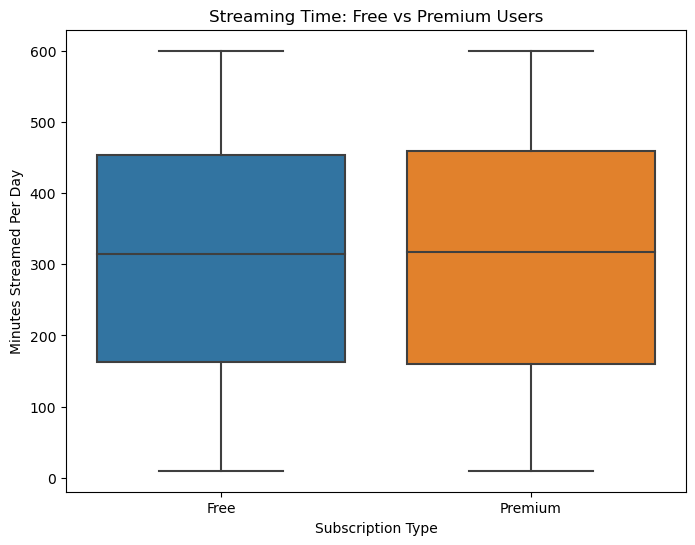

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subscription Type', y='Minutes Streamed Per Day', data=streaming_data)
plt.title('Streaming Time: Free vs Premium Users')
plt.xlabel('Subscription Type')
plt.ylabel('Minutes Streamed Per Day')
plt.show()

In [12]:
from scipy import stats

free_users = streaming_data[streaming_data['Subscription Type'] == 'Free']['Minutes Streamed Per Day']
premium_users = streaming_data[streaming_data['Subscription Type'] == 'Premium']['Minutes Streamed Per Day']

t_stat, p_value = stats.ttest_ind(free_users, premium_users, equal_var=False)  # Welch’s t-test
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference in streaming time between Free and Premium users is statistically significant.")
else:
    print("No significant difference in streaming time between Free and Premium users.")

T-statistic: 0.140
P-value: 0.88857
No significant difference in streaming time between Free and Premium users.


/var/folders/83/qq23vy9d507gkyr1ypzz_hbm0000gn/T/ipykernel_33190/2701918015.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(


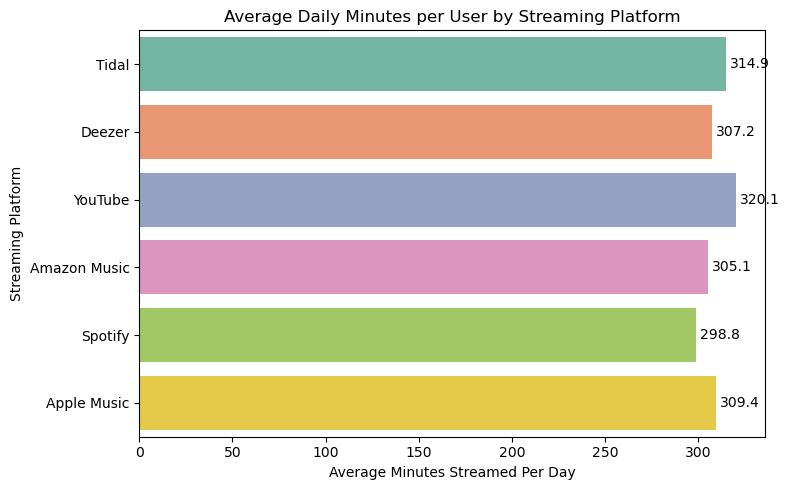

In [23]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(
    data=streaming_data,
    y='Streaming Platform',
    x='Minutes Streamed Per Day',
    estimator='mean',
    ci=None,  # 95% confidence intervals
    palette='Set2'
)
plt.title('Average Daily Minutes per User by Streaming Platform')
plt.xlabel('Average Minutes Streamed Per Day')
plt.ylabel('Streaming Platform')

#label the values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.tight_layout()

plt.show()


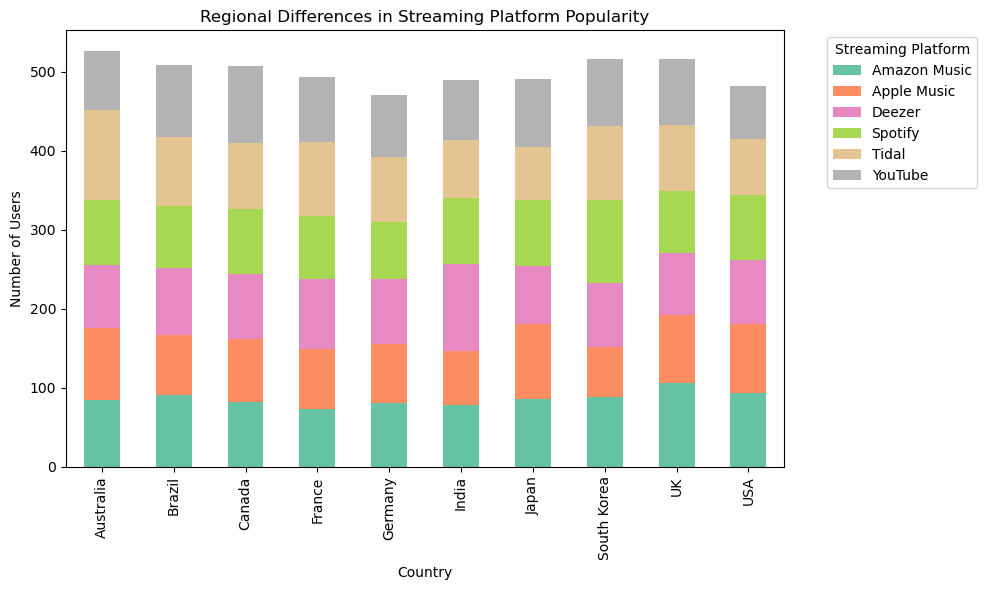

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Count users per platform per country
platform_country = streaming_data.groupby(['Country', 'Streaming Platform']).size().unstack(fill_value=0)

# Plot stacked bar chart
platform_country.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Regional Differences in Streaming Platform Popularity')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.legend(title='Streaming Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


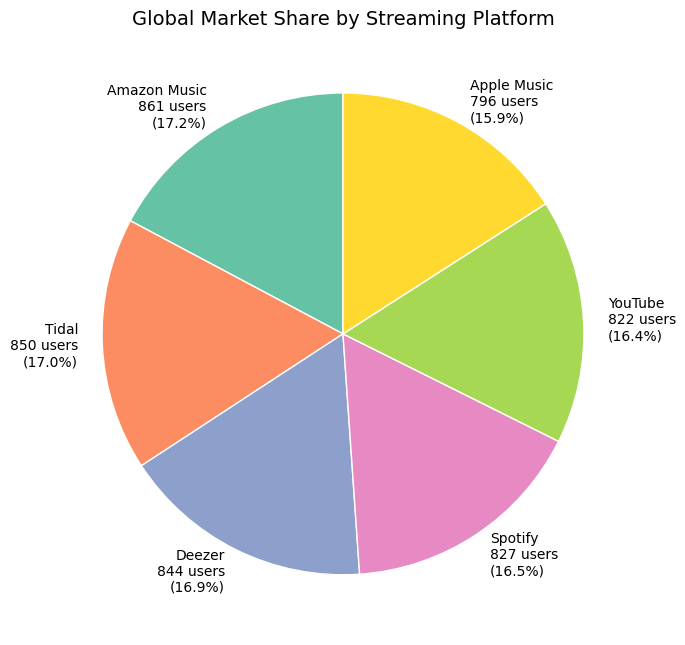

In [26]:
# Get platform counts
platform_counts = streaming_data['Streaming Platform'].value_counts()
platform_percentages = platform_counts / platform_counts.sum() * 100

# Create labels: "Platform - count (xx.x%)"
labels = [
    f"{name}\n{count} users\n({perc:.1f}%)"
    for name, count, perc in zip(platform_counts.index, platform_counts.values, platform_percentages.values)
]

# Plot donut chart
plt.figure(figsize=(7, 7))
plt.pie(
    platform_counts,
    labels=labels,
    startangle=90,
    colors=sns.color_palette('Set2'),
    wedgeprops={'width': 1.0, 'edgecolor': 'white'}  # makes donut shape
)
plt.title('Global Market Share by Streaming Platform', fontsize=14)
plt.tight_layout()
plt.show()


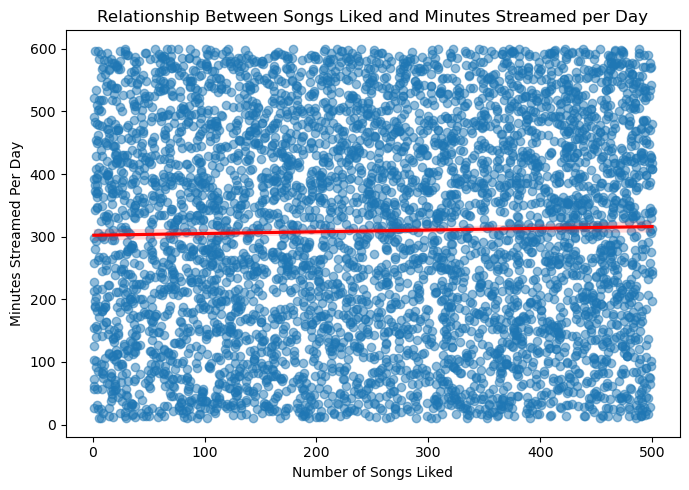

In [27]:
plt.figure(figsize=(7, 5))
sns.regplot(
    data=streaming_data,
    x='Number of Songs Liked',
    y='Minutes Streamed Per Day',
    scatter_kws={'alpha': 0.5},  # make points semi-transparent
    line_kws={'color': 'red'}    # regression line in red
)
plt.title('Relationship Between Songs Liked and Minutes Streamed per Day')
plt.xlabel('Number of Songs Liked')
plt.ylabel('Minutes Streamed Per Day')
plt.tight_layout()
plt.show()


In [28]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(
    streaming_data['Number of Songs Liked'],
    streaming_data['Minutes Streamed Per Day']
)

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {p_value:.3e}")


Pearson correlation: 0.023
P-value: 9.680e-02
